# KNN classifier on shuffled MNIST data

The data can be obtained from [THE MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/).

In [1]:
%matplotlib inline

import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mpcolors
import mnist
from sklearn import neighbors

train_image_labels = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
train_images = idx2numpy.convert_from_file('train-images-idx3-ubyte')
test_image_labels = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')
test_images = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')

Let's take a look at some our data.

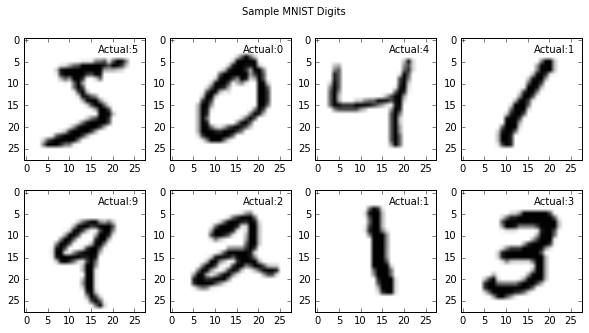

In [2]:
fig = plt.figure(figsize=(10,5))
for i in range (8):
    fig.add_subplot(2,4,i + 1)
    mnist.plot_image(train_images[i], train_image_labels[i])
fig.suptitle("Sample MNIST Digits")
plt.show()

Let's try training a nearest neighbors model, now.

In [3]:
flattened_train_images = train_images.reshape((train_images.shape[0], 
                                               train_images.shape[1]*train_images.shape[2]), 
                                              order='C')
nn_clf = neighbors.KNeighborsClassifier(n_neighbors=1, algorithm='brute')
nn_clf.fit(flattened_train_images, train_image_labels)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Let's test it out on the test data now.

In [4]:
flattened_test_images = test_images.reshape((test_images.shape[0], 
                                             test_images.shape[1]*test_images.shape[2]) ,
                                            order='C')
1 - nn_clf.score(flattened_test_images[:1000], test_image_labels[:1000]) # error rate

0.038000000000000034

Out of curiousity, let's look at the images that were wrongly predicted.

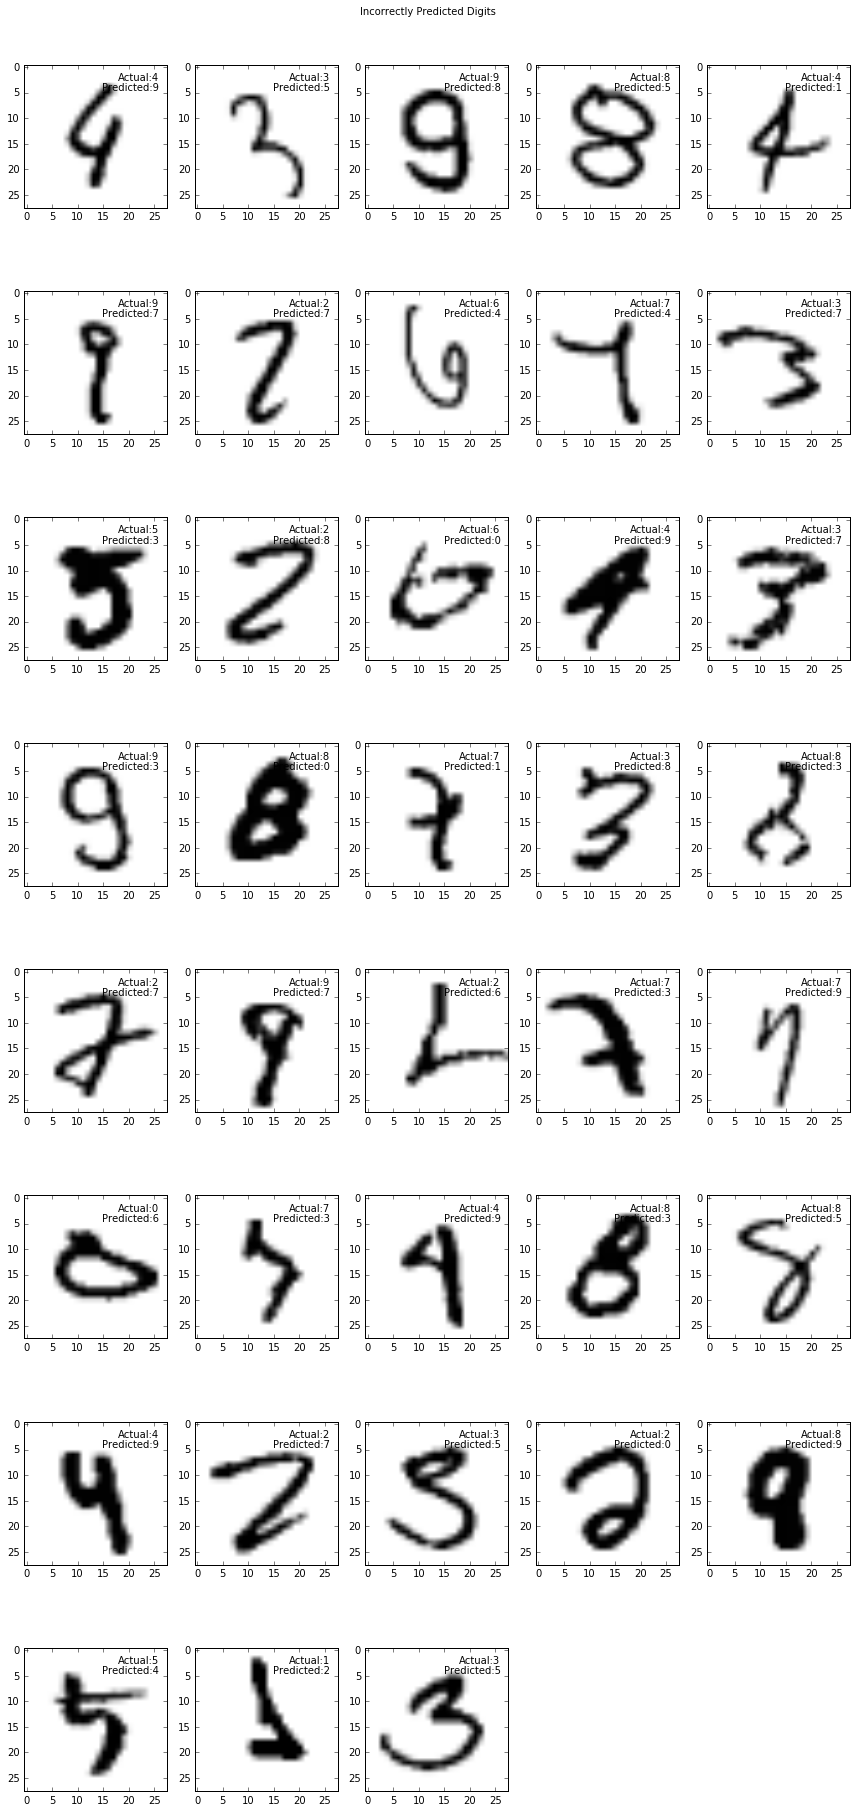

In [5]:
test_image_predictions = nn_clf.predict(flattened_test_images[:1000])
wrong_test_predictions_idx = np.arange(len(test_image_predictions))[test_image_predictions != test_image_labels[:1000]]
fig = plt.figure(figsize=(12,26))
fig.suptitle("Incorrectly Predicted Digits")
for i in range(len(wrong_test_predictions_idx)):
    idx = wrong_test_predictions_idx[i]
    fig.add_subplot((len(wrong_test_predictions_idx) + 4)//5, 5, i + 1)
    mnist.plot_image(test_images[idx], test_image_labels[idx], test_image_predictions[idx])
fig.suptitle("Incorrectly Predicted Digits")
fig.tight_layout()
fig.subplots_adjust(top=0.97)
plt.show()
    

Now, the question asks us to show that permutations do not affect accuracy. This is obvious from the formulation, but let's humor the question since I need to improve my skills with NumPy.

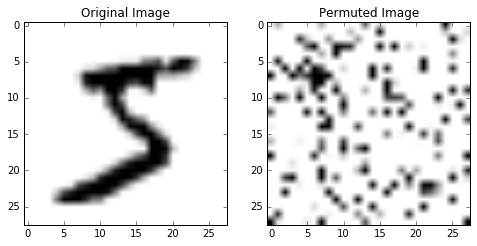

In [6]:
idx_permutation = np.random.permutation(np.arange(flattened_test_images.shape[1]))
permuted_flattened_train_images = flattened_train_images.copy()
permuted_flattened_test_images = flattened_test_images.copy()
for i in range(len(permuted_flattened_train_images)):
    permuted_flattened_train_images[i] = permuted_flattened_train_images[i][idx_permutation]
for i in range(len(permuted_flattened_test_images)):
    permuted_flattened_test_images[i] = permuted_flattened_test_images[i][idx_permutation]
permuted_train_images = permuted_flattened_train_images.reshape(train_images.shape, order='C')
permuted_test_images = permuted_flattened_test_images.reshape(test_images.shape, order='C')
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
mnist.plot_image(train_images[0], ax=ax1)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Permuted Image")
mnist.plot_image(permuted_train_images[0], ax=ax2)

Clearly, the digit now looks like nonsense, but the error rate does not change.

In [7]:
permuted_nn_clf = neighbors.KNeighborsClassifier(n_neighbors=1, algorithm='brute')
permuted_nn_clf.fit(permuted_flattened_train_images, train_image_labels)
1 - permuted_nn_clf.score(permuted_flattened_test_images[:1000], test_image_labels[:1000])

0.038000000000000034